# 문제 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
entry_data = pd.read_csv('./entry_data.csv')
sales_data = pd.read_csv('./sales_data.csv', encoding='utf-8-sig')
item_data = pd.read_csv('./item_data.csv')
item_entry_data = pd.read_csv('./item_entry_data.csv')

In [3]:

entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [7]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

sales_data['결제일시'] = pd.to_datetime(sales_data['결제일시'], infer_datetime_format=True)
sales_data['payment_ym'] = sales_data['결제일시'].dt.strftime("%Y-%m")
sales_data['결제금액']= sales_data['결제금액'].str.replace(',','', regex=True).astype(int)
sales_data.dtypes

결제일시          datetime64[ns]
판매위치                  object
상품명                   object
결제방식                  object
비고                    object
판매수량                   int64
결제금액                   int64
고객                    object
payment_ym            object
dtype: object

In [8]:
temp_var = pd.DataFrame()
temp_var['결제금액'] = sales_data.groupby('payment_ym')['결제금액'].sum()
temp_var

,결제금액
payment_ym,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


/home/doeun/anaconda3/envs/maskYolov5Project/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/doeun/anaconda3/envs/maskYolov5Project/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/doeun/anaconda3/envs/maskYolov5Project/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/doeun/anaconda3/envs/maskYolov5Project/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


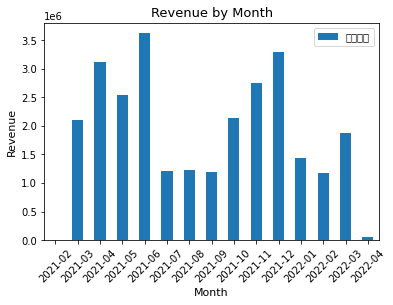

In [9]:
COLORS = sns.color_palette()
def plot_bar(df, xlabel,ylabel,title,color=COLORS[0], figsize=(30,10), rotation=45):
    plot=df.plot(kind='bar')
    plot.set_xlabel(xlabel,fontsize=11)
    plot.set_ylabel(ylabel,fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
    
plot_bar(temp_var,'Month','Revenue','Revenue by Month')

# 문제 2

In [3]:
sales_data['판매수량'].unique()

array([ 1, -1])

In [4]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
temp_Var2 = pd.DataFrame()
temp_Var2 = sales_data[sales_data['판매수량']==1].value_counts('상품명').head(10)
temp_Var2

상품명
김치볶음밥         1204
라면             749
짜장라면           455
치즈불고기볶음밥       420
계란추가           314
낙지볶음밥          312
새우볶음밥          309
아메리카노(ICE)     284
치즈감자튀김         246
감자튀김           242
dtype: int64

[Text(0, 0, '김치볶음밥'),
 Text(1, 0, '라면'),
 Text(2, 0, '짜장라면'),
 Text(3, 0, '치즈불고기볶음밥'),
 Text(4, 0, '계란추가'),
 Text(5, 0, '낙지볶음밥'),
 Text(6, 0, '새우볶음밥'),
 Text(7, 0, '아메리카노(ICE)'),
 Text(8, 0, '치즈감자튀김'),
 Text(9, 0, '감자튀김')]

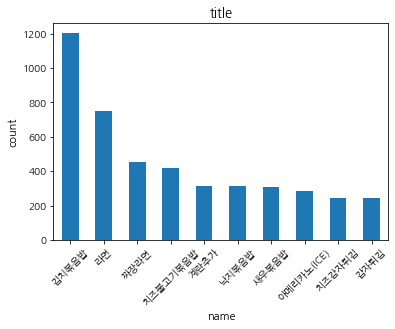

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt=temp_Var2.plot(kind='bar')
plt.set_xlabel('name', fontsize=11)
plt.set_ylabel('count',fontsize=11)
plt.set_title('title',fontsize=13)
plt.set_xticklabels(labels=temp_Var2.index, rotation=45)


# 문제 3

In [7]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [40]:
temp_Var3 = pd.DataFrame()
# temp_Var3 = entry_data.sort_values(by=['요금제명', '금액'])
# temp_Var3
temp_Var3 = entry_data.groupby('요금제명').sum('금액').sort_values(by=['금액'], ascending=False).head(10)
temp_Var3


,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


[Text(0, 0, '한국대생 입장권(종일권)'),
 Text(1, 0, '입장권(종일권)'),
 Text(2, 0, '심야-조조무제한(06시까지)'),
 Text(3, 0, '심야-조조무제한'),
 Text(4, 0, '한국대생 무제한 입장권'),
 Text(5, 0, '시간요금제(1시간)'),
 Text(6, 0, '시간요금제(3시간)'),
 Text(7, 0, '무제한 입장권'),
 Text(8, 0, '18시이후 무제한'),
 Text(9, 0, '조조무제한')]

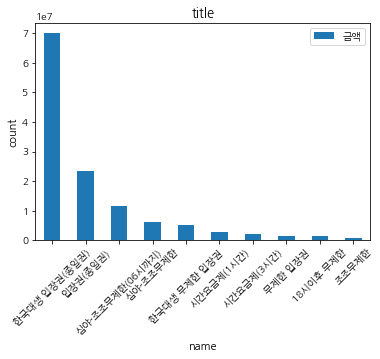

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt=temp_Var3.plot(kind='bar')
plt.set_xlabel('name', fontsize=11)
plt.set_ylabel('count',fontsize=11)
plt.set_title('title',fontsize=13)
plt.set_xticklabels(labels=temp_Var3.index, rotation=45)